## Лабораторная работа 4.

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Лисовский Кирилл Алексеевич
#### Никитенко Андрей Михайлович
#### Уксусников Николай Алексеевич
#### Савин Михаил Валерьевич
#### Степаненко Дмитрий Владимирович

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [86]:
import numpy as np
import math
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from scipy.optimize import curve_fit

## 2. Загрузите из mat-файла Fort.mat ряд, содержащий отсчеты некоторого реального ВР, всего 174 отсчета в вектор-строке.:

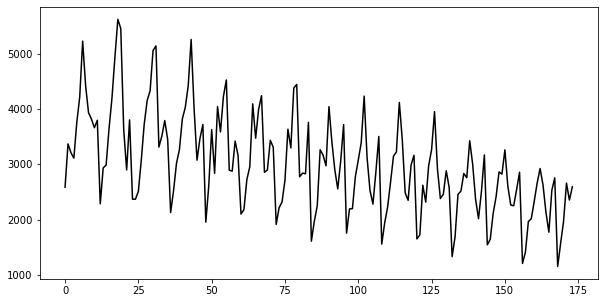

In [87]:
file = h5py.File('Fort.mat', 'r') 
data = file.get('Fort') 
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

## 3. На глаз, в ряде видна явная сезонность, присутствует некоторый убывающий тренд. Был выбран короткий ряд, чтобы повысить скорость расчетов.

## 4. Произведем ретроспективный прогноз, то есть у нас всегда будут точки, по которым можно будет сравнить, правильным получился прогноз, или нет. Для этого отрежем от данного ряда последние 24 точки (которые мы и будем прогнозировать):

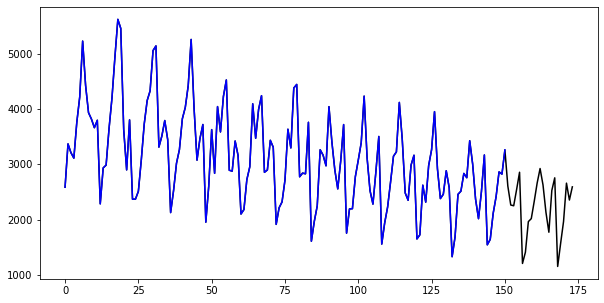

In [88]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

## 5. Начнем с простейших методов прогноза. Построим регрессионную модель тренда первого, второго и третьего порядка на основе ранее изученной методики, а затем используем полученные регрессионные кривые для прогноза тренда.

## 6. Для прогноза по методу регрессии используем готовые библиотеки. Например, с помощью sklearn:

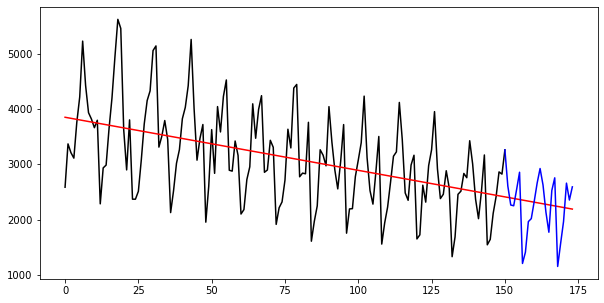

In [89]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

## 7. Напрямую через МНК библиотеки statsmodels:

Результирующие коэффициенты B0 и B1: [3849.23884629   -9.58949808]


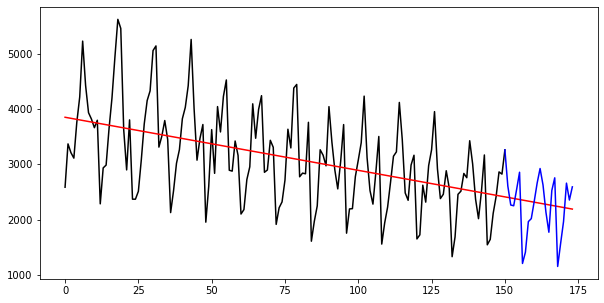

In [90]:
import statsmodels.api as sm
x_ = sm.add_constant(t)
smm = sm.OLS(Z, x_) 
res = smm.fit() # строим модель регрессии
print('Результирующие коэффициенты B0 и B1:',res.params) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r') # строим прогноз
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

## 8. Через полиномиальные кривые polyfit:

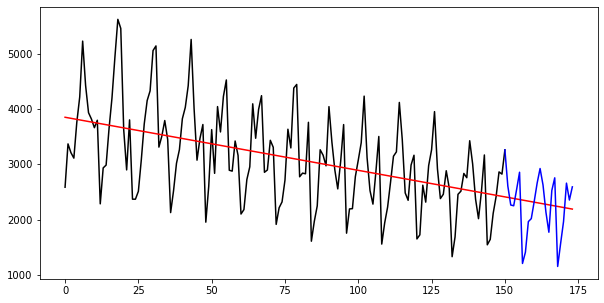

In [91]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

## 9. Через подгонку функций библиотеки scipy.optimize:

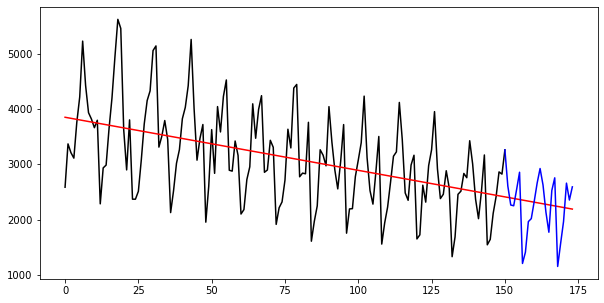

In [92]:
def func(t, b0, b1):
    return b0 + b1 * t
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

## 10. Теперь аналогичным образом постройте прогнозы трендов данного ряда для регрессионной кривой второго и третьего порядка, строя регрессионные модели тренда подобно тому, как это происходило в лабораторной работе №3.

### Модель тренда второй степени:

Коэффициенты B0, B1, B2: [ 3.85136553e+03 -9.67513622e+00  5.70920912e-04]


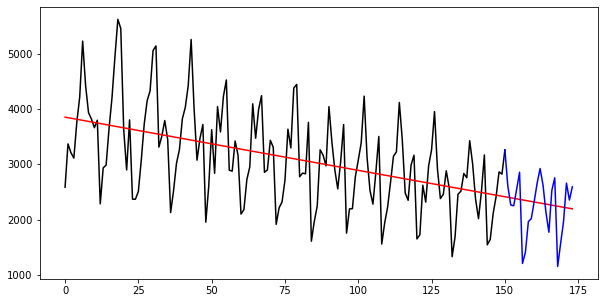

In [93]:
def func(t, b0, b1,b2):
    return b0+b1*t+b2*t*t
popt2, pcov2 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
print('Коэффициенты B0, B1, B2:',popt2) # получаем коэффициенты
plt.show()

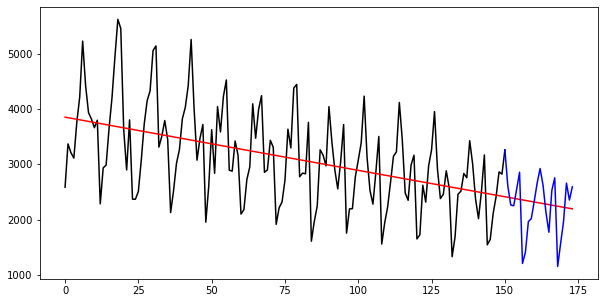

3851.3655266916803
-9.675136220020523
0.0005709209137653367


In [94]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()
print(bb[2])
print(bb[1])
print(bb[0])

### Модель тренда третьей степени:

Коэффициенты B0, B1, B2,B3: [ 3.69558459e+03  2.99832429e+00 -2.11356707e-01  9.41900565e-04]


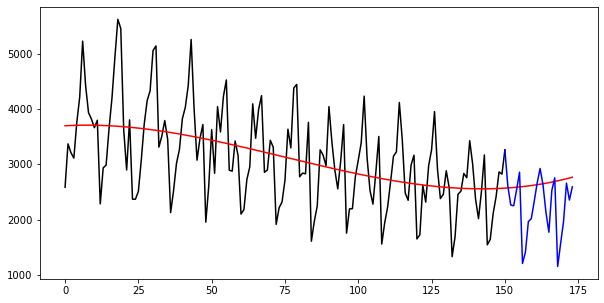

174


In [95]:
def func(t, b0, b1,b2,b3):
    return b0 + b1*t + b2*t*t + b3*t*t*t
popt3, pcov3 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
print('Коэффициенты B0, B1, B2,B3:',popt3) # получаем коэффициенты
plt.show()
print(len(t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0]))

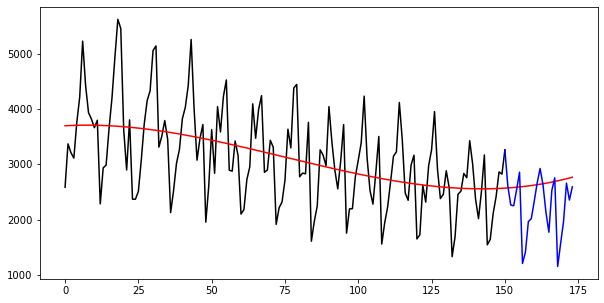

3695.584591946981
2.9983242865205444
-0.21135670661846978
0.0009419005668099328


In [96]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()
print(bb[3])
print(bb[2])
print(bb[1])
print(bb[0])

## 11. Оцените точность каждого из получившихся прогнозов с помощью следующих оценок (где M – число прогнозируемых точек):

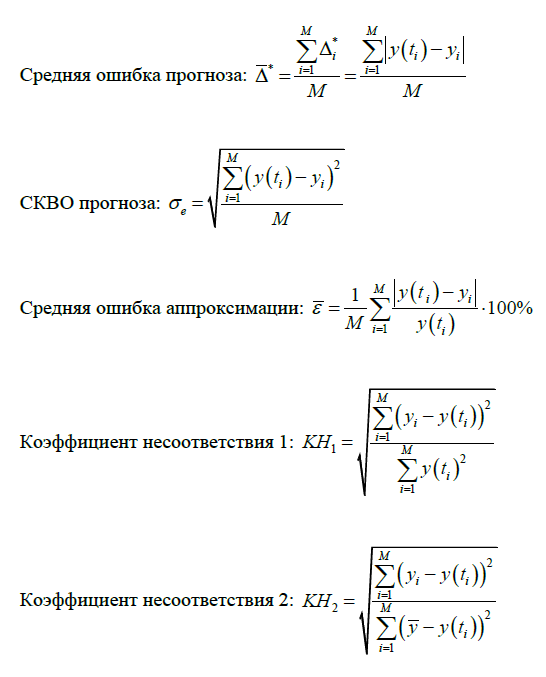

### Средняя ошибка прогноза:

#### По регрессионной прямой первого порядка:

In [97]:
print ('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(reg.predict(t0[-24:])))/len(Fort[-24:]))

Средняя ошибка прогноза:  33.951572557220665


In [98]:
print('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*popt[1]+popt[0]))/len(Fort[-24:]))

Средняя ошибка прогноза:  33.951572561884255


#### По регрессионной прямой второго порядка:

In [99]:
print('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*popt2[2]+t0[-24:]*popt2[1]+popt2[0]))/len(Fort[-24:]))

Средняя ошибка прогноза:  37.16595240288431


#### По регрессионной прямой третьего порядка:

In [100]:
print('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*t0[-24:]*popt3[3]+t0[-24:]*t0[-24:]*popt3[2]+t0[-24:]*popt3[1]+popt3[0]))/len(Fort[-24:]))

Средняя ошибка прогноза:  379.86356036270234


### Вычисление СКВО прогноза:

#### По регрессионной прямой первого порядка:

In [101]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза:  531.2841349811364


#### По регрессионной прямой второго порядка:

In [102]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]))**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза:  531.51357138277


#### По регрессионной прямой третьего порядка:

In [103]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3]+t0[i]*t0[i]*popt3[2]+t0[i]*popt3[1]+popt3[0]))**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза:  665.0082858768126


### Средняя ошибка аппроксимации:

#### По регрессионной прямой первого порядка:

In [104]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*popt[1]+popt[0]) ))/Fort[i]

print('Средняя ошибка апроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации:  23.51441298819064


#### По регрессионной прямой второго порядка:

In [105]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]) ))/Fort[i]

print('Средняя ошибка апроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации:  23.53339382816084


#### По регрессионной прямой третьго порядка:

In [106]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1]+popt3[0]) ))/Fort[i]

print('Средняя ошибка апроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации:  29.3051761072894


## 12. Этот показатель обычно интерпретируется следующим образом: если меньше 10%, то точность прогноза высокая, если от 10% до 20%, то точность прогноза хорошая, если от 20% до 50%, то точность прогноза удовлетворительная, если более 50%, то прогноз неудовлетворителен.

### Коэффициент несоответствия 1

In [107]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка: ', KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка: ', KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка: ', KH1)

Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка:  0.2281001855332692
Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка:  0.22819869117711378
Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка:  0.28551297394763747


### Коэффициент несоответствия 2

In [108]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*popt[1]+popt[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка: ', np.sqrt(a/b))

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка: ', np.sqrt(a/b))

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка: ', np.sqrt(a/b))

Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка:  0.9906202068430789
Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка:  0.9910480086927459
Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка:  1.239959190068869


## 13. Построим доверительные интервалы для тренда первого порядка:

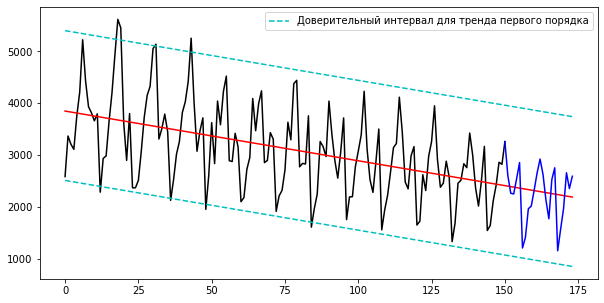

In [109]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, p(t0)+upper, 'c--',label='Доверительный интервал для тренда первого порядка')
plt.plot(t0, p(t0)-lower, 'c--')
plt.legend()

plt.show()

## 14. Построим доверительные интервалы для тренда второго и третьего порядков:

#### Для тренда второго порядка:

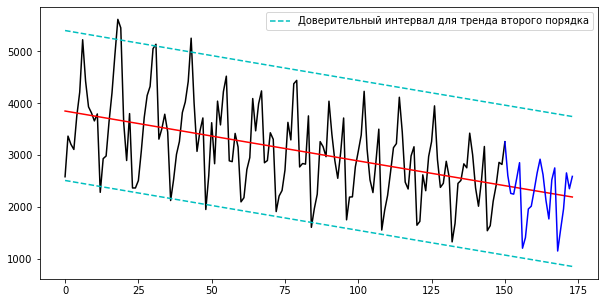

In [110]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0+upper, 'c--',label='Доверительный интервал для тренда второго порядка')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0-lower, 'c--')
plt.legend()

plt.show()

#### Для тренда третьего порядка:

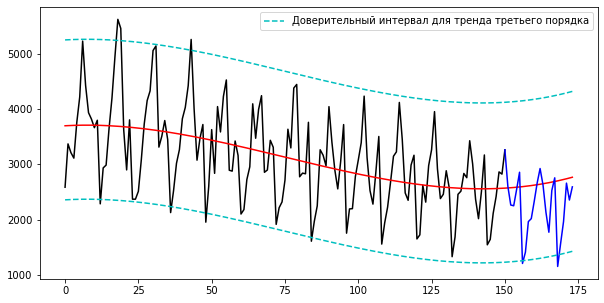

In [111]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0+upper, 'c--',label='Доверительный интервал для тренда третьего порядка')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0-lower, 'c--')
plt.legend()

plt.show()

### Доверительный интервал всегда определяет две границы – верхнюю и нижнюю. Внутри получившегося «коридора» находится расчетный прогноз. Этот прогноз (будучи случайной величиной) не выходит статистически за границы доверительного интервала с заданной величиной альфа. Если построенная модель прогноза адекватна, то с вероятностью альфа можно утверждать, что при сохранении сложившихся закономерностей развития тенденции, прогноз попадает внутрь доверительного интервала.

## 15. Метод построения регрессионной кривой через подгонку функций библиотеки scipy.optimize позволяет по МНК задавать любую форму кривой. Попробуйте самостоятельно задать некоторую параметрическую кривую, которая давала бы более высокую точность, нежели простые линейные регрессионные кривые. Оцените ее точность аналогично и постройте эмпирические оценки доверительных интервалов.

### Зададим ВР псевдослучайными значениями. И попробуем для него выстроить регрессионные кривые, оценить точность и построить эмперические оценки доверительных интервалов

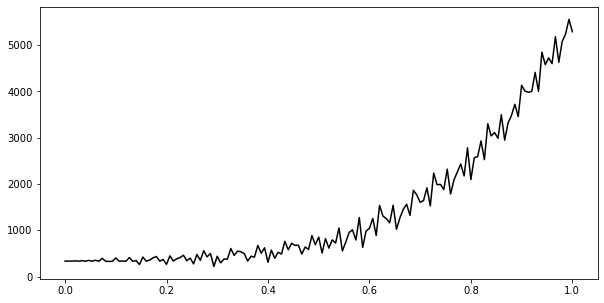

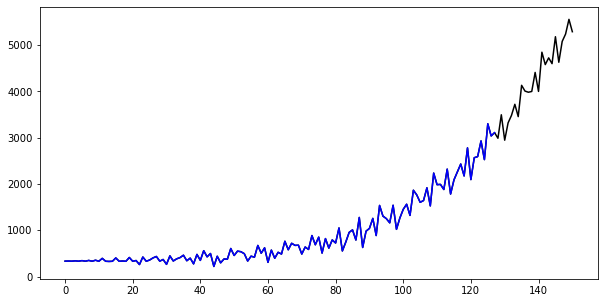

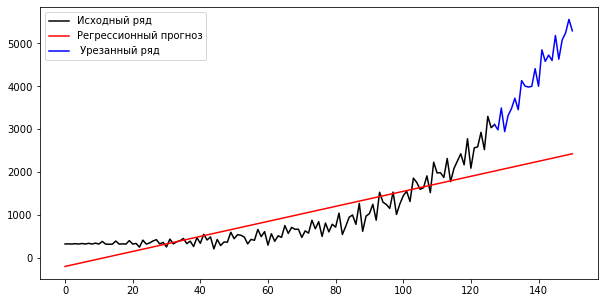

Значения коэффициентов B0, B1 [-189.94479722   17.47003194]


In [112]:
Fort=t**4/10**5 + t + (10**16)*np.sin(np.pi*t) + 1000*np.random.rand()
plt.figure(figsize = (10, 5))
t = np.linspace(0, 1, len(Fort))
plt.plot(t, Fort, 'k')
plt.show()

Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)

def func(t, b0, b1):
    return b0 + b1 * t
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k',label='Исходный ряд')
plt.plot(t0, t0*popt[1]+popt[0], 'r',label='Регрессионный прогноз')
plt.plot(t0[-24:], Fort[-24:], 'b', label=' Урезанный ряд')
plt.legend()
plt.show()

print('Значения коэффициентов B0, B1', popt)

### Теперь аналогичным образом построим прогнозы трендов данного ряда для регрессионной кривой второго и третьего порядка:

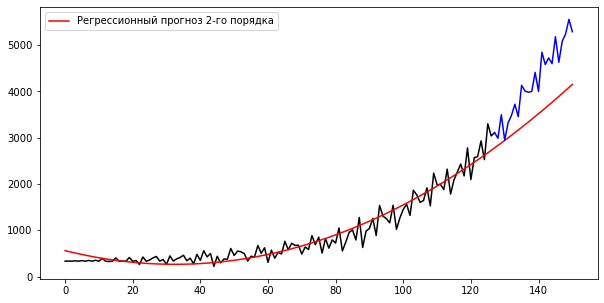

Коэффициенты B0, B1, B2: [ 5.60183507e+02 -1.82503635e+01  2.81262956e-01]


In [113]:
def func(t, b0, b1,b2):
    return b0+b1*t+b2*t*t
popt2, pcov2 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0], 'r',label='Регрессионный прогноз 2-го порядка')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.legend()
plt.show()

print('Коэффициенты B0, B1, B2:', popt2) # получаем коэффициенты

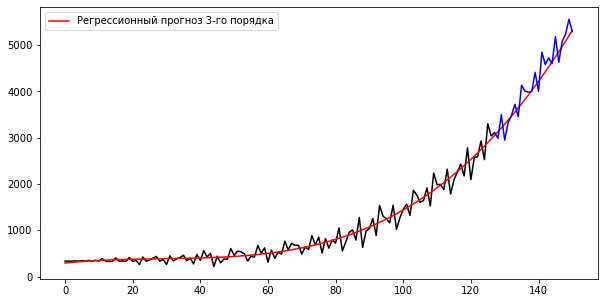

Коэффициенты B0, B1, B2,B3: [ 2.91076328e+02  7.68698089e+00 -2.31322147e-01  2.69073545e-03]


In [114]:
def func(t, b0, b1,b2,b3):
    return b0 + b1*t + b2*t*t + b3*t*t*t
popt3, pcov3 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], 'r',label='Регрессионный прогноз 3-го порядка')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.legend()
plt.show()

print('Коэффициенты B0, B1, B2,B3:', popt3) # получаем коэффициенты

### Оценка точности каждого из получившихся прогнозов:

### Средняя ошибка прогноза:

#### По регрессионной прямой первого порядка:

In [115]:
print('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*popt[1]+popt[0]))/len(Fort[-24:]))

Средняя ошибка прогноза:  1969.5475794867314


#### По регрессионной прямой второго порядка:

In [116]:
print('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*popt2[2]+t0[-24:]*popt2[1]+popt2[0]))/len(Fort[-24:]))

Средняя ошибка прогноза:  757.9605186860057


#### По регрессионной прямой третьего порядка:

In [117]:
print('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*t0[-24:]*popt3[3]+t0[-24:]*t0[-24:]*popt3[2]+t0[-24:]*popt3[1]+popt3[0]))/len(Fort[-24:]))

Средняя ошибка прогноза:  89.68274112516337


### Вычисление СКВО прогноза


#### По регрессионной прямой первого порядка:

In [118]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза:  2073.967220920495



#### По регрессионной прямой второго порядка:

In [119]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]))**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза:  850.5592622731796



#### По регрессионной прямой третьего порядка:

In [120]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3]+t0[i]*t0[i]*popt3[2]+t0[i]*popt3[1]+popt3[0]))**2

print('СКВО прогноза:' , np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 238.9926541257341


### Средняя ошибка аппроксимации:

#### По регрессионной прямой первого порядка:

In [121]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*popt[1]+popt[0]) ))/Fort[i]

print('Средняя ошибка апроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации:  45.564705524986714


#### По регрессионной прямой второго порядка:

In [122]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]) ))/Fort[i]

print('Средняя ошибка апроксимации: ',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации:  16.978986677600886


#### По регрессионной прямой третьго порядка:

In [123]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1]+popt3[0]) ))/Fort[i]

print('Средняя ошибка апроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации:  4.654397086945989


### Коэффициент несоответствия 1:

In [124]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка: ', KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка: ', KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка: ', KH1)

Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка:  0.48589672791656763
Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка:  0.19927217666161498
Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка:  0.05599208486248386


### Коэффициент несоответствия 2:

In [125]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*popt[1]+popt[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка: ', np.sqrt(a/b))

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка: ', np.sqrt(a/b))

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка: ', np.sqrt(a/b))

Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка:  2.710812356145201
Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка:  1.1117372225297435
Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка:  0.31237920893678967


### Построим доверительные интервалы для тренда первого порядка:

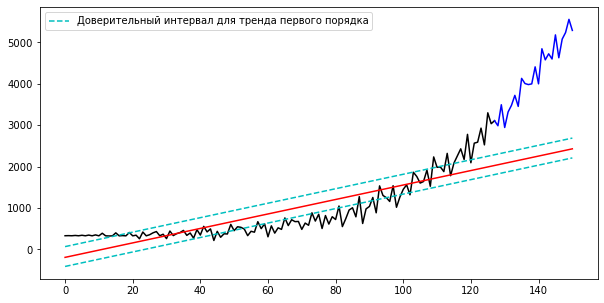

In [126]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, p(t0)+upper, 'c--',label='Доверительный интервал для тренда первого порядка')
plt.plot(t0, p(t0)-lower, 'c--')
plt.legend()

plt.show()

### Построим доверительные интервалы для тренда второго порядка:

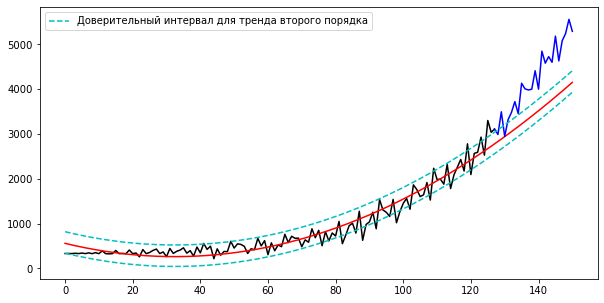

In [127]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0+upper, 'c--',label='Доверительный интервал для тренда второго порядка')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0-lower, 'c--')
plt.legend()

plt.show()

### Построим доверительные интервалы для тренда третьего порядка:

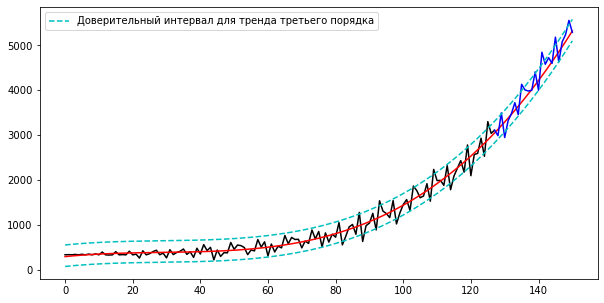

219.24356607024475
259.7479577330789


In [128]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0+upper, 'c--',label='Доверительный интервал для тренда третьего порядка')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0-lower, 'c--')
plt.legend()

plt.show()

print(lower)
print(upper)

## Выводы по работе

В ходе выполнения данной лабораторной работы были изучены подходы к декомпозиции временных рядов на простейшие компоненты, одной из которых является тренд. Кроме того, рассмотрены такие способы построения кривых тренда, как регрессионные методы подгонки, методы скользящего сглаживания, и другие. Изучены методы прогнозирования временных рядов на основе минимизации среднеквадратичной ошибки. В ходе выполнения работы приобретены навыки и умения по применению методик экстраполяции трендов и прогнозирования на основе простых моделей. По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.